# __Hands-on with TensorFlow: Part A__

Let's see how TensorFlow works and build a deep neural network model using the MNIST dataset.

## Steps to be followed:
1. Import TensorFlow
2. Load the MNIST dataset
3. Create the model
4. Get predictions from the model
5. Apply softmax activation to the predictions
6. Define the loss function
7. Compile the model
8. Train the model
9. Evaluate the model
10. Create a probability model

## Step 1: Import TensorFlow

- Import TensorFlow and check its version.


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


## Step 2: Load the MNIST dataset

- Load the MNIST dataset and normalize the input data by dividing the train and test sets by 255. The pixel values of the images are divided by 255.0 to normalize them to the range [0, 1]



The MNIST dataset is a large collection of handwritten digits commonly used for training and testing in the field of machine learning. It is one of the most well-known datasets for evaluating the performance of image processing and pattern recognition algorithms.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# x_train

__Observation:__
- The dataset has been downloaded.

## Step 3: Create the model

- Create a Sequential model with flatten, dense, and dropout layers.


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10)
 tf.keras.layers.Dense(10, activation='softmax')
    
])

## Step 4: Get predictions from the model

- Get the predictions from the model using the train data for one column, as the optimizer is not yet applied.


In [18]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.05417335, 0.10171273, 0.10952824, 0.04761361, 0.12064556,
        0.09092385, 0.12442694, 0.1332063 , 0.10922365, 0.10854587]],
      dtype=float32)

__Observation:__
- An array of predicted values is displayed.

## Step 5: Apply softmax activation to the predictions

- Apply softmax activation to the predictions and print the output in terms of probabilities.


In [10]:
tf.nn.softmax(predictions).numpy()

array([[0.03786895, 0.17250021, 0.10153943, 0.11500139, 0.08280644,
        0.09465282, 0.12639709, 0.04436111, 0.1698892 , 0.05498325]],
      dtype=float32)

__Observation:__
- The predicted values in terms of probabilities are displayed as an array.

## Step 6: Define the loss function

- Create a loss function for the model.
- Define the SparseCategoricalCrossentropy loss function.


In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train[:1], predictions).numpy()

2.3575397

__Observation:__
- Here, the value is 3.46.

## Step 7: Compile the model

- Compile the model with the Adam optimizer, the loss function, and the accuracy metric.

In [14]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

__Observation:__
- Here, we have used an optimizer as Adam, loss as a loss function, and metrics as accuracy.

## Step 8: Train the model

- Fit the model using the training data for 5 epochs.


In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2970 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0873 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0754 - accuracy: 0.9761


__Observations:__
- The model fits the data.
- Here, we can see that the accuracy is increased by different epochs.

## Step 9: Evaluate the model

- Evaluate the model using the testing data and print the results.


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0700 - accuracy: 0.9794 - 775ms/epoch - 2ms/step


[0.07002254575490952, 0.9793999791145325]

__Observation:__

- The accuracy score is 0.979, and the loss is 0.07.

## Step 10: Create a probability model

- Create a probability model by adding the softmax layer to the existing model.



In [20]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

- Get the predictions using the test data

In [21]:
probability_model(x_test[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.09934868, 0.10317407, 0.10337967, 0.09677029, 0.1005985 ,
        0.10175157, 0.09944291, 0.0982507 , 0.09834921, 0.09893443],
       [0.09915863, 0.09630595, 0.10310828, 0.0946117 , 0.10578315,
        0.10028901, 0.10343701, 0.10391488, 0.09556808, 0.09782334],
       [0.10022383, 0.09772832, 0.10004133, 0.09696166, 0.10249593,
        0.1017231 , 0.09918086, 0.10220619, 0.10094564, 0.09849311]],
      dtype=float32)>

In [22]:
model(x_train[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.05417335, 0.10171273, 0.10952824, 0.04761361, 0.12064556,
        0.09092385, 0.12442694, 0.1332063 , 0.10922365, 0.10854587]],
      dtype=float32)>

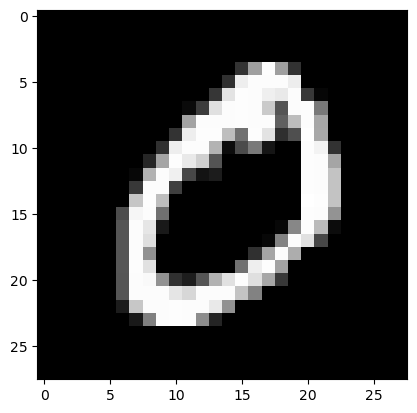

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[1], cmap = 'gray')

__Observation:__
- Here, we have the probabilities for the first three observations and different classes.